In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
data = pd.read_csv('./ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
exam1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
exam2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
admitted,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


In [4]:
data.dtypes

exam1       float64
exam2       float64
admitted      int64
dtype: object

In [5]:
data.admitted.value_counts()

1    60
0    40
Name: admitted, dtype: int64

### Plot Data

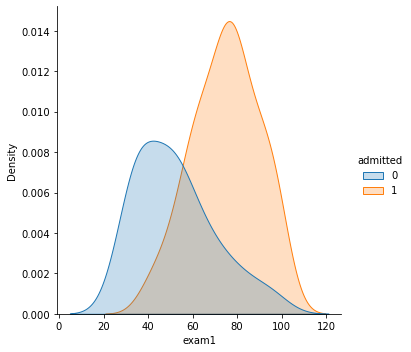

In [6]:
sns.displot(data=data, x="exam1", hue="admitted", kind='kde', fill=True)

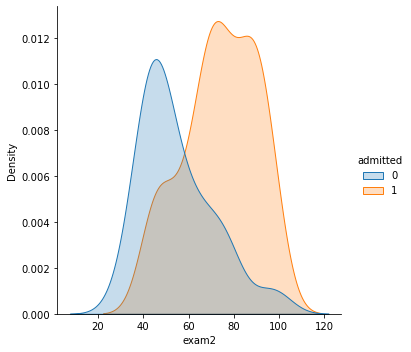

In [7]:
sns.displot(data=data, x="exam2", hue="admitted", kind='kde', fill=True)

In [8]:
np.exp(0)

1.0

<AxesSubplot:xlabel='exam1', ylabel='exam2'>

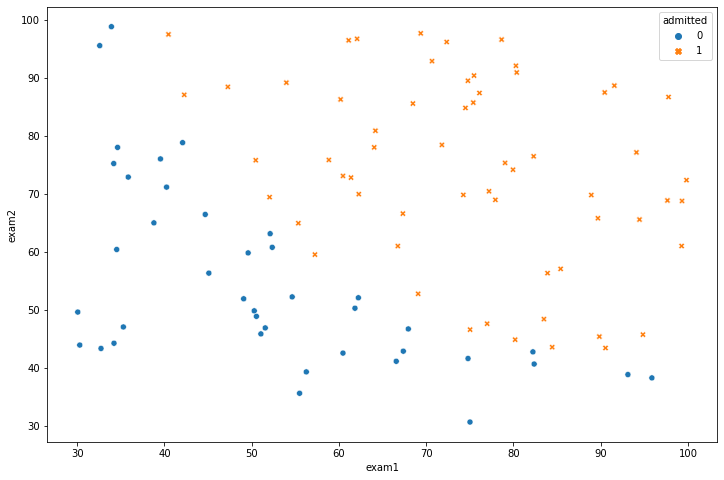

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, 
                x="exam1", 
                y="exam2", 
                hue='admitted', 
                style='admitted',
                )

In [10]:
from sigmoid import sigmoid

In [11]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)

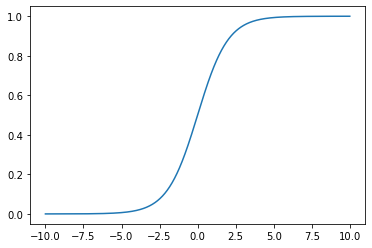

In [12]:
plt.plot(x, y)

In [13]:
np.zeros((3, 1))

array([[0.],
       [0.],
       [0.]])

In [14]:
# features
X = data.iloc[:, 0:2].values
# target
y = data.admitted.values

In [15]:
X.shape, y.shape

((100, 2), (100,))

In [16]:
# add the intercept (bias) to the dataset
m, n = X.shape
X_b = np.c_[np.ones((m, 1)), X]

In [17]:
m, n = X_b.shape

In [75]:
def costFunction(X, y, thetas):
    m, n = X.shape
    gradients = []
    cost = -(1/m) * sum(y.dot(np.log(sigmoid(X.dot(thetas)))) + \
                        (1 - y).dot(np.log(1 - sigmoid(X.dot(thetas)))))
    
    for i in range(n):    
        gradient = sum((sigmoid(X.dot(thetas)) - y).dot(X[:,i])) / m
        gradients.append(gradient/100)
        
    return (cost, np.array(gradients).reshape(thetas.shape))

In [76]:
# initialize parameter vector
initial_thetas = np.zeros((n, 1))

In [77]:
cost, gradients = costFunction(X_b, y, initial_thetas)

In [78]:
cost

0.6931471805599452

In [79]:
gradients

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [80]:
test_theta = np.array([-24, 0.2, 0.2]).reshape(3,1)

In [81]:
cost1, gradients1 = costFunction(X_b, y, test_theta)

In [82]:
cost1

0.21833019382659793

In [83]:
initial_thetas - gradients.reshape(3,1)

array([[ 0.1       ],
       [12.00921659],
       [11.26284221]])

### Gradient Descent

In [98]:
#best theta
def gradientDescent(X, y, thetas, alpha, iterations):
    for iteration in range(iterations):
        cost, gradients = costFunction(X, y, thetas)
        thetas = thetas - (alpha * gradients)
    return thetas

In [120]:
gradientDescent(X_b, y, initial_thetas, 0.001, 500)

array([[-0.03787784],
       [ 0.23593102],
       [-0.18802531]])

In [121]:
best_thetas = gradientDescent(X_b, y, initial_thetas, 0.001, 1000)

In [122]:
cost, gradients = costFunction(X_b, y, best_thetas)

In [123]:
cost

3.7966249468268023